In [2]:
import sys
sys.path.append('C:\\Users\\Gabriel\\GitHub\\bloqueios')
import newBlock as nb
import pandas as pd
import xarray as xr
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metpy.calc as mpcalc
import calendar
from statsmodels.tsa.seasonal import STL
from scipy import stats
import matplotlib as mpl


In [23]:
vento = xr.open_dataset("D:\\_Gabriel\\Estudo\\UFF\\Bloqueios_Atmosfericos\\Climatologias\\nc\\ver_inv_850hPa.nc")
dayly = vento.resample(time="D", keep_attrs=True).mean()

In [24]:
dayly.u.attrs.update({'units': 'm s**-1', 'long_name': 'U component of wind', 'standard_name': 'eastward_wind'})
dayly.v.attrs.update({'units': 'm s**-1', 'long_name': 'V component of wind', 'standard_name': 'northward_wind'})
dayly_obj = nb.lammoc_dataset(dayly, 'ERA-5')

In [8]:
climat_div = dayly_obj.formatar(lon = [-60, -40], opr='divergência', time = ['1979-01-01', '2010-12-01'])

In [9]:
climat_vort = dayly_obj.formatar(lon = [-60, -40], opr='vorticidade', time = ['1979-01-01', '2010-12-01'])

In [10]:
ind = blockix([climat_vort, climat_div], bloq='total', freq='M')

C:\Users\Gabriel\miniconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [11]:
ind['time'] = ind.time.dt.month

In [12]:
jan_dez = xr.concat([ind.sel(time=1),ind.sel(time=12)], dim='time')

In [13]:
climat = jan_dez.groupby('time').mean()

In [58]:
lev_div = dayly_obj.formatar(lon = [-60, -40], opr='divergência', time = ['1979-01-01', '2018-12-01'])

In [59]:
lev_vort = dayly_obj.formatar(lon = [-60, -40], opr='vorticidade', time = ['1979-01-01', '2018-12-01'])

In [74]:
lev_ind = blockix([lev_vort, lev_div], bloq='total', freq='M')
#lev_ind['time'] = lev_ind.time.dt.month
#lev_jan_dez = xr.concat([lev_ind.sel(time=1),lev_ind.sel(time=12)], dim='time')
#lev = lev_jan_dez.groupby('time').mean()
#anom = lev - climat

C:\Users\Gabriel\miniconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [118]:
df_teste = blockix([lev_vort.formatar(time=slice('1979-01-01', '2018-12-01')), lev_div.formatar(time=slice('1979-01-01', '2018-12-01'))], 'total', 'M').to_dataframe()
df_teste[df_teste.index.month==12]

C:\Users\Gabriel\miniconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


,índice de bloqueios
time,
1979-12-01,0.0
1980-12-01,0.0
1981-12-01,1.0
1982-12-01,0.0
1983-12-01,0.0
1984-12-01,1.0
1985-12-01,0.0
1986-12-01,1.0
1987-12-01,0.0


In [115]:
lev_ind.to_dataframe()

,índice de bloqueios
time,
1979-01-01,0.0
1979-02-01,0.0
1979-03-01,2.0
1979-04-01,12.0
1979-05-01,20.0
...,...
2018-08-01,0.0
2018-09-01,0.0
2018-10-01,0.0


In [92]:
lev_ind.isel(time=2)

<xarray.Dataset>
Dimensions:              ()
Coordinates:
    time                 datetime64[ns] 1979-03-01
Data variables:
    índice de bloqueios  float64 2.0

In [88]:
DF_total = lev_ind.to_dataframe()
DF_total.index = pd.to_datetime(DF_total.index)

In [103]:
jan = DF_total[DF_total.index.month==1]
dez = DF_total[DF_total.index.month==12]

In [110]:
jan

,índice de bloqueios
time,
1979-01-01,0.0
1980-01-01,0.0
1981-01-01,1.0
1982-01-01,0.0
1983-01-01,0.0
1984-01-01,2.0
1985-01-01,0.0
1986-01-01,0.0
1987-01-01,0.0


In [116]:
dez

,índice de bloqueios
time,
1979-12-01,0.0
1980-12-01,0.0
1981-12-01,1.0
1982-12-01,0.0
1983-12-01,0.0
1984-12-01,1.0
1985-12-01,0.0
1986-12-01,1.0
1987-12-01,0.0


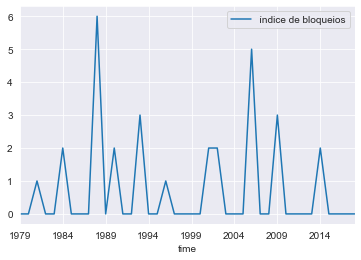

In [108]:
jan.plot()

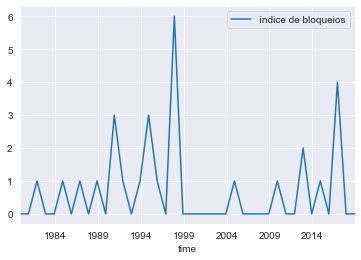

In [111]:
dez.plot()

In [22]:
plt.plot()

<xarray.Dataset>
Dimensions:              (time: 11658)
Coordinates:
  * time                 (time) int64 1 1 1 1 1 1 1 1 ... 11 11 11 11 11 11 12
Data variables:
    índice de bloqueios  (time) float64 nan nan nan nan nan ... nan nan nan nan

In [20]:
climat

<xarray.Dataset>
Dimensions:              (time: 2)
Coordinates:
  * time                 (time) int64 1 12
Data variables:
    índice de bloqueios  (time) float64 0.4314 0.3689

In [21]:
lev

<xarray.Dataset>
Dimensions:              (time: 2)
Coordinates:
  * time                 (time) int64 1 12
Data variables:
    índice de bloqueios  (time) float64 0.1579 0.3226

In [19]:
anom

<xarray.Dataset>
Dimensions:              (time: 2)
Coordinates:
  * time                 (time) int64 1 12
Data variables:
    índice de bloqueios  (time) float64 -0.2735 -0.04635

In [6]:
def posix(datasets, bloq = 'continuo', freq='D'):

    da = []
    
    if type(datasets) != list:
        datasets = [datasets]
        
    for ds in datasets:
        
        start = pd.to_datetime(ds.dataset.time.values[0])
        end = pd.to_datetime(ds.dataset.time.values[-1])
        latitudes = [ds.dataset.lat.values[0], ds.dataset.lat.values[-1]]
        longitudes = [ds.dataset.lon.values[0], ds.dataset.lon.values[-1]]
        
        ext_name = ds.dataset.to_array().isel(variable=0)
        var = str(ext_name['variable'].values)
    
        med = ds.media_regional()
        dropped = med.dataset.where(med.dataset[var]>0, drop=True)
        bloqueio = 0 
        bloqueios = {} 

        for ix, dia in enumerate(pd.to_datetime(dropped.time.values)):
            aux = dropped.sel(time=dia)
            if ix == 0:
                count = 1
                bloqueio = 0
                bloqueios.update({dia: bloqueio})
            else:
                if (dia == pd.to_datetime(dropped.time.values[ix-1]) + datetime.timedelta(days = 1)) and (dia.day != 1):
                    count += 1
                    if count >= 3:
                        bloqueio += 1
#                         bloqueios.update({dia: bloqueio})
                    if bloq == 'total':
                        bloqueios.update({dia - datetime.timedelta(days = 1): 0})
                        bloqueios.update({dia: bloqueio})
                    else:
                        bloqueios.update({dia: bloqueio})
                else:
                    count = 1
                    bloqueio = 0
                    bloqueios.update({dia: bloqueio})
                    
        da.append(xr.DataArray(list(bloqueios.values()), coords=[list(bloqueios.keys())], dims=['time'], name=var))
        
    ds = xr.merge(da)
    ds = ds.reindex({"time": pd.date_range(start=start, end=end, freq='D')})
#     ds = ds.fillna(0, inplace=True)
#     ds = ds.dropna('time', 'any')

    if freq == 'D':
        ds.attrs['lat'] = str(latitudes[0]) + " : " + str(latitudes[1])
        ds.attrs['lon'] = str(longitudes[0]) + " : " + str(longitudes[1])
        return ds
    
    elif freq == 'M' and bloq == 'total':
        ds = ds.resample(time='MS').sum()
#         ds = ds.dropna('time', 'any')
        ds.attrs['lat'] = str(latitudes[0]) + " : " + str(latitudes[1])
        ds.attrs['lon'] = str(longitudes[0]) + " : " + str(longitudes[1])
        return ds
    
    elif freq == 'season' and bloq == 'total':
        ds = ds.resample(time='QS-DEC').sum()
#         ds = ds.dropna('time', 'any')
        ds.attrs['lat'] = str(latitudes[0]) + " : " + str(latitudes[1])
        ds.attrs['lon'] = str(longitudes[0]) + " : " + str(longitudes[1])
        return ds

In [7]:
def blockix(ds, bloq='continuo', freq='D'):
    
    bloqueios = {}
    positivos = posix([ds[0], ds[1]])
    datas = positivos.dropna('time', 'any')
    count = 0
    
    for ix, dia in enumerate(pd.to_datetime(datas.time.values)):
        
        if ix == 0:
            if datas.div.sel(time=dia) != 0 and datas.vort.sel(time=dia) != 0:
                count += 1
            else: 
                count = 0
            bloqueios.update({dia: count})

        if (dia == pd.to_datetime(datas.time.values[ix-1]) + datetime.timedelta(days = 1)) and (dia.day != 1):
            if datas.div.sel(time=dia) != 0 and datas.vort.sel(time=dia) != 0:
                count += 1
    #                 bloqueios.update({dia: count})

                if bloq == 'total':
                    bloqueios.update({dia - datetime.timedelta(days = 1): 0})
                    bloqueios.update({dia: count})

                elif bloq == 'continuo':
    #                 bloqueios.update({dia - datetime.timedelta(days = 1): count-1})
                    bloqueios.update({dia: count})

            else:
                count = 0
                bloqueios.update({dia: count})    

        else:
            count = 0
            if datas.div.sel(time=dia) != 0 and datas.vort.sel(time=dia) != 0:
                count += 1
            bloqueios.update({dia: count})

    indice = xr.DataArray(list(bloqueios.values()), coords=[list(bloqueios.keys())], dims=['time'], name='índice de bloqueios')
    indice = indice.reindex({"time": pd.date_range(start=positivos.time.values[0], end=positivos.time.values[-1], freq='D')})
    indice = indice.to_dataset()

    if freq == 'D':
        indice = indice
        return indice
        
    elif freq == 'M' and bloq == 'total':
        indice = indice.resample(time='MS').sum()
    #     indice = indice.dropna('time', 'any')
        return indice

    elif freq == 'season' and bloq == 'total':
        indice = indice.resample(time='QS-DEC').sum()
        return indice

    

In [7]:
def vazoes(regiao = 'todas'):
    
    vazoes = pd.read_csv("Índices/vazoesdiarias.csv", sep=";", header=5, index_col=0, decimal = ',', low_memory=False)
    vazoes.index = pd.to_datetime(vazoes.index, errors='coerce')
    
    vazoes_br = vazoes.loc['1979-01-01' : '2019-01-01', ['246', '34', '237', '240', '33', '24', '6', '18', '156', '168', '275', '287', '285', '190', '254']]
    vazoes_br = vazoes_br.apply(pd.to_numeric, errors='ignore')
    
    vazoes_sul = vazoes.loc['1979-01-01' : '2019-01-01', ['111', '217', '74', '78', '66', '63', '61']]
    vazoes_sul = vazoes_sul.apply(pd.to_numeric, errors='ignore')
    
    br = xr.Dataset.from_dataframe(vazoes_br)
    br = br.rename({'index': 'time'})
    br = br.sortby('time')
    
    sul = xr.Dataset.from_dataframe(vazoes_sul)
    sul = sul.rename({'index': 'time'})
    sul = sul.sortby('time')
    
    if regiao == 'todas':
        return [br, sul]
    
    elif regiao == 'sul':
        return sul
    
    elif regiao == 'br':
        return br

In [8]:
def normalizar(ds):
    
    minimum = []
    maximum = []
    
    for index in ds.data_vars:
        minimum.append(ds.data_vars[index].values.min())
        maximum.append(ds.data_vars[index].values.max())
        datamin = np.min(minimum)
        datamax = np.max(maximum)
        
    norm = (ds-datamin)/(datamax-datamin)
    
    return norm

In [104]:
def vazcorrs(atmds, regiao, freq, season=None, mes=None, savefig=False, save_csv=False, csv_type=None):
    
    '''
    Calcula as correlações entre os índices (bloqueio, vorticidade, divergência) e as vazões naturais das usinas. Os valores das vazões são normalizados para que, em razão da diferença entre as dimensões espaciais das usinas, não haja discrepância entre os dados. 
    
    Call signature.:
    
        vazcorrs(atmds, regiao, freq, season=None, mes=None, savefig=False, save_csv=False, csv_type=None)
    
    Parameters
    ----------
    atmds: list 
    
        Lista de datasets de vorticidade e divergência. Função recebe até *três* datasets, sendo que o último da lista (atmds[2]), nesse estudo, deve ser o *dataset da vorticidade em 500 hpa*.
        
        EX.: atmds = [div850, vort850, vort500] --> vort500 por último (!!) --> div850 e vort850 não importa a ordem (!!)
    
    regiao: str, {"sul", "todas", "br"}
        
        Região das usinas em análise. Se "sul", serão computadas somente usinas do sul do Brasil. Se "br", serão computadas todas as usinas *exceto* as do sul. Se "todas", todas usinas serão computadas.
    
    freq: str, {"M" (ou "monthly"), "season"}
    
        Determina o tipo de análise da série de dados. "Season" corresponde a análise sazonal e "M" (ou "monthly") mensal.
        
    season: str, {"DJF", "MAM", "JJA", "SON"}
        
        Somente se * freq = "season" *, deve-se fornecer a estação do ano em análise.
    
    mes: int, range(1, 13)
    
        Somente se * freq = "M" *, deve-se fornecer o mês em análise.
        
    Kwargs
    ------
    
    savefig: bool
        
        Salva a imagem gerada no diretório segundo o mesmo caminho que 'arquivo.ipynb' está sendo executado. O nome da imagem é pré-definido em função do tipo de bloqueio (Completo, Sul ou Norte), região (*regiao*), frequência (*freq*) e *season*/*mes* (depende do valor fornecido para *freq*) 

        Ex.: 'corr_BloqueioNorte_SUL_DEC_1979_2010.png' 
    
    save_csv: bool
    
        Salva o arquivo 'csv' do dataframe correspondente ao valor fornecido em *csv_type*. Assim como *savefig*, o nome do 'csv' é pré-definido em função do tipo de bloqueio (Completo, Sul ou Norte), região (*regiao*), frequência (*freq*) e *season*/*mes* (depende do valor fornecido para *freq*) 
 
        Ex.: 'corr_BloqueioNorte_SUL_DEC_1979_2010.csv'
        
    csv_type: str, {"corr", "ind"}
    
        Determina o dataframe a ser exportado em formato 'csv'. Se * csv_type = "corr" *, o 'arquivo.csv' exportado é aquele correspondente ao dataframe das correlações. Se * csv_type = "ind" *, o 'arquivo.csv' exportado é aquele correspondente ao dataframe original, antes de serem feitas as correlações. 
    
    Return
    ------
    Figura do gráfico de correlações entre os índices e as vazões naturais das usinas brasileiras. 
    
    '''
    
    # DATASETS DOS ÍNDICES (DEPOIS SERÃO CONVERTIDOS EM DATASET)
    indice_bloq = blockix([atmds[0], atmds[1]], bloq='total', freq=freq)
    
    indice_div_vort = posix([atmds[0], atmds[1]], bloq='total', freq=freq)
    indice_div_vort = indice_div_vort.rename({"vort":"vort_850", "div":"div_850"})
    
    indice_vort_500 = posix(atmds[2], bloq='total', freq=freq)
    indice_vort_500 = indice_vort_500.rename({"vort":"vort_500"})
    
    # NOMEANDO O BLOQUEIO EM FUNÇÃO DE SUAS LATITUDES (BLOQUEIO NORTE, SUL, COMPLETO)
    # 'BLOQ_NAME' PARA NOME DA IMAGEM SALVA E 'BLOQ_NAME_TITLE' PARA TITULO DA FIGURA
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-10.0_-25.0':
        bloq_name = "BloqueioCompleto"
        bloq_name_title = "Bloqueio Completo"
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-10.0_-17.5':
        bloq_name = "BloqueioNorte"
        bloq_name_title = "Bloqueio Norte"
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-17.5_-25.0':
        bloq_name = "BloqueioSul"   
        bloq_name_title = "Bloqueio Sul"
    
    # FORMATANDO O DATASET DE VAZÕES PARA MESMO INTERVALO TEMPORAL DO DATASET DE INDICES_BLOQ / INDICES_DIV_VORT
    if regiao == "todas":
        vaz_br = vazoes(regiao=regiao)[0].sel(time=slice(pd.to_datetime(indice_bloq.time.values[0]), pd.to_datetime(indice_bloq.time.values[-1]))).to_array()
        vaz_sul = vazoes(regiao=regiao)[1].sel(time=slice(pd.to_datetime(indice_bloq.time.values[0]), pd.to_datetime(indice_bloq.time.values[-1]))).to_array()
        vaz_total = [vaz_br, vaz_sul]
        vaz = xr.concat(vaz_total, dim="variable").to_dataset(dim="variable")
    elif regiao == "sul":
        vaz = vazoes(regiao=regiao).sel(time=slice(pd.to_datetime(indice_bloq.time.values[0]), pd.to_datetime(indice_bloq.time.values[-1])))
        
    # FORMATANDO O DATASET DE VAZÕES PARA SER COERENTE COM O TIPO DE ANÁLISE DO DATASET DE ÍNDICES (DEPENDE DO VALOR DE 'FREQ')
    if freq == 'season':
        normvaz = normalizar(vaz.resample(time='QS-DEC').mean()).to_dataframe()
    elif freq == 'M' or freq == 'month':
        normvaz = normalizar(vaz.resample(time='MS').mean()).to_dataframe()
    
    # JUNTANDO OS 4 DATASETS E FORMATANDO EM DATAFRAME (TIRAR A CORRELAÇÃO E MELHOR VISUALIZAÇÃO)
    df = normvaz.join([indice_bloq.to_dataframe(), indice_div_vort.to_dataframe(), indice_vort_500.to_dataframe()])
    df.fillna(0, inplace=True)
    
    # REORGANIZANDO AS COLUNAS DO DATAFRAME
    new = []
    col_list = list(df)
    for i in range(-4, 0):
        index = i
        new.append(col_list[index])
    for i in range(0, len(col_list)-4):
        new.append(col_list[i])
        
    df = df[new]
    df = df.rename(columns={"índice de bloqueios": "Índice de bloqueios (850 hPa)", "div_850": "Persistência de divergência (850 hPa)", "vort_850": "Persistência de vorticidade (850 hPa)", "vort_500": "Persistência de vorticidade (500 hPa)", "246":"Porto Primavera", "34":"Ilha Solteira", "237":"Barra Bonita", "240":"Promissão", "33":"São Simão", "24":"Emborcação", "6":"Furnas", "18":"Água Vermelha", "156":"Três Marias", "168":"Sobradinho", "275":"Tucuruí", "287":"Santo Antônio", "285":"Jirau", "190":"Boa Esperança", "254":"Pedra do Cavalo", "111":"Passo Real", "217":"Machadinho", "74":"Foz do Areia", "78":"Salto Osório", "66":"Itaipu", "63":"Rosana", "61":"Capivara"})
    
    # SELECIONANDO O MÊS/SEASON DE ANÁLISE NO DATAFRAME
    if freq == 'season':
        if season == "DJF":
            df = df[df.index.month==12]         
        if season == "MAM":
            df = df[df.index.month==3]       
        if season == "JJA":
            df = df[df.index.month==6]                
        if season == "SON":
            df = df[df.index.month==9]
    elif freq == 'month' or freq == 'M':
        df = df[df.index.month==mes]
        
    ixcorrs = {}
    v850corrs = {}
    d850corrs = {}
    v500corrs = {}
        
    # CÁLCULO DAS CORRELAÇÕES COM O TESTE DE SIGNIFÂNCIA (95 %)
    for column in df.columns:
        if stats.pearsonr(df[column], df['Índice de bloqueios (850 hPa)'])[1] < 0.05:
            ixcorrs.update({column: stats.pearsonr(df[column], df['Índice de bloqueios (850 hPa)'])[0]})
        else:
            ixcorrs.update({column: np.nan})
        if stats.pearsonr(df[column], df['Persistência de vorticidade (850 hPa)'])[1] < 0.05:
            v850corrs.update({column: stats.pearsonr(df[column], df['Persistência de vorticidade (850 hPa)'])[0]})
        else:
            v850corrs.update({column: np.nan})
        if stats.pearsonr(df[column], df['Persistência de divergência (850 hPa)'])[1] < 0.05:
            d850corrs.update({column: stats.pearsonr(df[column], df['Persistência de divergência (850 hPa)'])[0]})
        else:
            d850corrs.update({column: np.nan})
        if stats.pearsonr(df[column], df['Persistência de vorticidade (500 hPa)'])[1] < 0.05:
            v500corrs.update({column: stats.pearsonr(df[column], df['Persistência de vorticidade (500 hPa)'])[0]})
        else:
            v500corrs.update({column: np.nan})

    df_1 = pd.DataFrame.from_dict(ixcorrs, orient='index', columns=['Índice de bloqueios (850 hPa)'])
    df_2 = pd.DataFrame.from_dict(v850corrs, orient='index', columns=['Persistência de vorticidade (850 hPa)'])
    df_3 = pd.DataFrame.from_dict(d850corrs, orient='index', columns = ['Persistência de divergência (850 hPa)'])
    df_4 = pd.DataFrame.from_dict(v500corrs, orient='index', columns = ['Persistência de vorticidade (500 hPa)'])

    # GERANDO E FORMATANDO O DATAFRAME FINAL DE CORRELAÇÕES
    df = pd.concat([df_1, df_3, df_2, df_4], axis=1)
    corre = df.T.drop(['Índice de bloqueios (850 hPa)', 'Persistência de vorticidade (850 hPa)', 'Persistência de divergência (850 hPa)', 'Persistência de vorticidade (500 hPa)'], axis=1)
        
    # PLOTANDO O HEATMAP E ATRIBUINDO AS FORMATAÇÕES E 'DESIGN' NECESSÁRIOS PARA CADA REGIÃO
    if regiao == 'sul':
        corr, ax = plt.subplots(figsize=(12,5))
        corr = sns.heatmap(corre, annot=True, annot_kws={'fontsize':12, 'weight': 'bold'}, cbar_kws={'pad': 0.02}, cmap='RdBu', vmin=-1, vmax=1, center = 0)
        plt.yticks(rotation=0, fontsize=12)
        plt.xticks(rotation=45, fontsize=12)
        
    elif regiao == 'todas':
        corr, ax = plt.subplots(figsize=(45,10))
        corr = sns.heatmap(corre, annot=True, annot_kws={'fontsize':25, 'weight': 'bold'}, cbar=False, cmap="RdBu", linewidths=0.5, vmin=-1, vmax=1, center = 0)
        cbar = plt.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1.,vmax=1.), cmap="RdBu"), pad=0.02, orientation="vertical", ax=ax)
        cbar.ax.tick_params(labelsize=25)
        plt.xticks(rotation=45, fontsize=25)
        plt.yticks(rotation=0, fontsize=25)
        
    # ESPECIFICAÇÕES DE TÍTULO DA FIGURA E DOS NOMES DAS IMAGENS / ARQUIVOS.CSV EXPORTADOS
    if freq == 'season':
        if regiao == 'sul':
            ax.set_title('Correlações: ' + bloq_name_title + ' x Bacias (' + regiao.upper() + ') | ' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + ' - ' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + ' | ' + season + "\n", fontsize=15, style="oblique")
        else:
            ax.set_title('Correlações: ' + bloq_name_title + ' x Bacias (' + regiao.upper() + ') | ' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + ' - ' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + ' | ' + season + "\n", fontsize=37, style="oblique")
        if savefig == True:
            plt.savefig('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.png', format='png', dpi=200, bbox_inches="tight")
        if save_csv == True:
            if csv_type == "corr":
                corre.to_csv('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')
            elif csv_type == "ind":
                df.to_csv('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')

    elif freq == 'month' or freq == 'M':
        if regiao == "sul":
            ax.set_title('Correlações: ' + bloq_name_title + ' x Bacias (' + regiao.upper() + ') | ' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + ' - ' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + ' | ' + calendar.month_abbr[mes].upper() + "\n", fontsize=15, style="oblique")
        else:
            ax.set_title('Correlações: ' + bloq_name_title + ' x Bacias (' + regiao.upper() + ') | ' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + ' - ' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + ' | ' + calendar.month_abbr[mes].upper() + "\n", fontsize=37, style="oblique")

        if savefig == True:
            plt.savefig('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.png', format='png', dpi=200, bbox_inches="tight")
        if save_csv == True:   
            if csv_type == "corr":
                corre.to_csv('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')
            elif csv_type == "ind":
                df.to_csv('corr_VAZ_' + bloq_name + '_' + regiao.upper() + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')


In [150]:
def asas_corrs(atmds, freq, season=None, mes=None, savefig=False, save_csv=False, csv_type=None):
    
    '''
    Calcula as correlações entre os índices (bloqueio, vorticidade, divergência) e as coordenadas do centro (ponto de máxima pressão) do ASAS.
    
    Call signature.:
    
        asas_corrs(atmds, freq, season=None, mes=None, savefig=False, save_csv=False, csv_type=None)
    
    Parameters
    ----------
    atmds: list 
    
        Lista de datasets de vorticidade e divergência. Função recebe até *três* datasets, sendo que o último da lista (atmds[2]), nesse estudo, deve ser o *dataset da vorticidade em 500 hpa*.
        
        EX.: atmds = [div850, vort850, vort500] --> vort500 por último (!!) --> div850 e vort850 não importa a ordem (!!)
    
    freq: str, {"M" (ou "monthly"), "season"}
    
        Determina o tipo de análise da série de dados. "Season" corresponde a análise sazonal e "M" (ou "monthly") mensal.
        
    season: str, {"DJF", "MAM", "JJA", "SON"}
        
        Somente se * freq = "season" *, deve-se fornecer a estação do ano em análise.
    
    mes: int, range(1, 13)
    
        Somente se * freq = "M" *, deve-se fornecer o mês em análise.
        
    Kwargs
    ------
    
    savefig: bool
        
        Salva a imagem gerada no diretório segundo o mesmo caminho que 'arquivo.ipynb' está sendo executado. O nome da imagem é pré-definido em função do tipo de bloqueio (Completo, Sul ou Norte), região (*regiao*), frequência (*freq*) e *season*/*mes* (depende do valor fornecido para *freq*) 

        Ex.: 'corr_BloqueioNorte_SUL_DEC_1979_2010.png' 
    
    save_csv: bool
    
        Salva o arquivo 'csv' do dataframe correspondente ao valor fornecido em *csv_type*. Assim como *savefig*, o nome do 'csv' é pré-definido em função do tipo de bloqueio (Completo, Sul ou Norte), região (*regiao*), frequência (*freq*) e *season*/*mes* (depende do valor fornecido para *freq*) 
 
        Ex.: 'corr_BloqueioNorte_SUL_DEC_1979_2010.csv'
        
    csv_type: str, {"corr", "ind"}
    
        Determina o dataframe a ser exportado em formato 'csv'. Se * csv_type = "corr" *, o 'arquivo.csv' exportado é aquele correspondente ao dataframe das correlações. Se * csv_type = "ind" *, o 'arquivo.csv' exportado é aquele correspondente ao dataframe original, antes de serem feitas as correlações. 
    
    Return
    ------
    Figura do gráfico de correlações entre os índices e as coordenadas do centro da ASAS. 
    
    '''
    
    # DATASETS DOS ÍNDICES 
    indice_bloq = blockix([atmds[0], atmds[1]], bloq='total', freq=freq)
    
    indice_div_vort = posix([atmds[0], atmds[1]], bloq='total', freq=freq)
    indice_div_vort = indice_div_vort.rename({"vort":"vort_850", "div":"div_850"})
    
    indice_vort_500 = posix(atmds[2], bloq='total', freq=freq)
    indice_vort_500 = indice_vort_500.rename({"vort":"vort_500"})
    
    # NOMEANDO O BLOQUEIO EM FUNÇÃO DE SUAS LATITUDES (BLOQUEIO NORTE, SUL, COMPLETO)
    # 'BLOQ_NAME' PARA NOME DA IMAGEM SALVA E 'BLOQ_NAME_TITLE' PARA TITULO DA FIGURA
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-10.0_-25.0':
        bloq_name = "BloqueioCompleto"
        bloq_name_title = "Bloqueio completo"
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-10.0_-17.5':
        bloq_name = "BloqueioNorte"
        bloq_name_title = "Bloqueio norte"
    if indice_div_vort.attrs['lat'][0:5] + '_' + indice_div_vort.attrs['lat'][8:13] == '-17.5_-25.0':
        bloq_name = "BloqueioSul"  
        bloq_name_title = "Bloqueio sul"
    
    time_list = [str(pd.to_datetime(indice_bloq.time.values[0])), str(pd.to_datetime(indice_bloq.time.values[-1]))]
    time_str = time_list[0][0:4] + '_' + time_list[1][0:4]
    
    if time_str == "2010_2018":
        df_max = pd.read_csv("C:/Users/augus/GitHub/bloqueios/coords_max_mslp_2010_2018.csv")
    if time_str == "1979_2010":
        df_max = pd.read_csv("C:/Users/augus/GitHub/bloqueios/coords_max_mslp.csv") 
        
    df_max["time"] = df_max["Unnamed: 0"]
    df_max = df_max.set_index("time")
    df_max = df_max.drop("Unnamed: 0", axis=1) 
    
    # DATAFRAME FINAL DOS ÍNDICES
    indices_df = indice_bloq.to_dataframe().join([indice_div_vort.to_dataframe(), indice_vort_500.to_dataframe(), df_max])
    indices_df = indices_df.rename(index={"latitude": "Latitude", "longitude": "Longitude"}, columns={"índice de bloqueios": "Índice de bloqueios (850 hPa)", "div_850": "Persistência de divergência (850 hPa)", "vort_850": "Persistência de vorticidade (850 hPa)", "vort_500": "Persistência de vorticidade (500 hPa)"})
    
    if freq == 'season':
        if season == "DJF":
            indices_df = indices_df[indices_df.index.month==12]         
        if season == "MAM":
            indices_df = indices_df[indices_df.index.month==3]       
        if season == "JJA":
            indices_df = indices_df[indices_df.index.month==6]                
        if season == "SON":
            indices_df = indices_df[indices_df.index.month==9]
    elif freq == 'month' or freq == 'M':
        indices_df = indices_df[indices_df.index.month==mes]
        
    ixcorrs = {}
    v850corrs = {}
    d850corrs = {}
    v500corrs = {}
        
    # CÁLCULO DAS CORRELAÇÕES COM O TESTE DE SIGNIFÂNCIA (95 %)
    for column in indices_df.columns:
        if stats.pearsonr(indices_df[column], indices_df['Índice de bloqueios (850 hPa)'])[1] < 0.05:
            ixcorrs.update({column: stats.pearsonr(indices_df[column], indices_df['Índice de bloqueios (850 hPa)'])[0]})
        else:
            ixcorrs.update({column: np.nan})
        if stats.pearsonr(indices_df[column], indices_df['Persistência de vorticidade (850 hPa)'])[1] < 0.05:
            v850corrs.update({column: stats.pearsonr(indices_df[column], indices_df['Persistência de vorticidade (850 hPa)'])[0]})
        else:
            v850corrs.update({column: np.nan})
        if stats.pearsonr(indices_df[column], indices_df['Persistência de divergência (850 hPa)'])[1] < 0.05:
            d850corrs.update({column: stats.pearsonr(indices_df[column], indices_df['Persistência de divergência (850 hPa)'])[0]})
        else:
            d850corrs.update({column: np.nan})
        if stats.pearsonr(indices_df[column], indices_df['Persistência de vorticidade (500 hPa)'])[1] < 0.05:
            v500corrs.update({column: stats.pearsonr(indices_df[column], indices_df['Persistência de vorticidade (500 hPa)'])[0]})
        else:
            v500corrs.update({column: np.nan})

    df_1 = pd.DataFrame.from_dict(ixcorrs, orient='index', columns=['Índice de bloqueios (850 hPa)'])
    df_2 = pd.DataFrame.from_dict(v850corrs, orient='index', columns=['Persistência de vorticidade (850 hPa)'])
    df_3 = pd.DataFrame.from_dict(d850corrs, orient='index', columns = ['Persistência de divergência (850 hPa)'])
    df_4 = pd.DataFrame.from_dict(v500corrs, orient='index', columns = ['Persistência de vorticidade (500 hPa)'])

    # GERANDO E FORMATANDO O DATAFRAME FINAL DE CORRELAÇÕES
    df = pd.concat([df_1, df_3, df_2, df_4], axis=1)
    corr = df.T.drop(['Índice de bloqueios (850 hPa)','Persistência de vorticidade (850 hPa)', 'Persistência de divergência (850 hPa)', 'Persistência de vorticidade (500 hPa)'], axis=1)
#     corr = corr.T
    
    fig, ax = plt.subplots(figsize=(26,7))
    fig = sns.heatmap(corr, annot=True, annot_kws={'fontsize':25, 'weight': 'bold'}, cbar=False, cmap='RdBu', vmin=-1, vmax=1, center = 0, linewidths=1, xticklabels=["Longitude", "Latitude"])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1.,vmax=1.), cmap="RdBu"), pad=0.02, orientation="vertical", ax=ax)
    cbar.ax.tick_params(labelsize=15, pad=10)
    plt.xticks(rotation=0, fontsize=22)
    plt.yticks(rotation=0, fontsize=20) 
    
    if time_str == "2010_2018":
        plt.title(f"Coordenadas do centro (ASAS) x Índices | 2010 - 2018 | {bloq_name_title}\n", style="oblique", fontsize=27)
    if time_str == "1979_2010":
        plt.title(f"Coordenadas do centro (ASAS) x Índices | 1979 - 2010 | {bloq_name_title}\n", style="oblique", fontsize=27)
    
    if freq == 'month' or freq == 'M':
        if save_csv == True:
            if csv_type == "corr":
                corr.to_csv('corr_ASAS_' + bloq_name + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')
            elif csv_type == "ind":
                indices_df.to_csv('corr_ASAS_' + bloq_name + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')

        if savefig == True:
            plt.savefig('corr_ASAS_' + bloq_name + '_' + calendar.month_abbr[mes].upper() + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.png', format='png', dpi=200, bbox_inches="tight")

    elif freq == 'season':
        if save_csv == True:
            if csv_type == "corr":
                corr.to_csv('corr_ASAS_' + bloq_name + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')
            elif csv_type == "ind":
                indices_df.to_csv('corr_ASAS_' + bloq_name + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.csv')

        if savefig == True:
            plt.savefig('corr_ASAS_' + bloq_name + '_' + season + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[0]))[:4] + '_' + str(pd.to_datetime(atmds[0].dataset.time.values[-1]))[:4] + '.png', format='png', dpi=200, bbox_inches="tight")

       

In [12]:
periodos = [['1979-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]
latitudes = [[-10, -25], [-17.5, -25], [-10,-17.5]]

In [13]:
div_850 = dayly_obj.formatar(lat = latitudes[1], lon = [-60, -40], time = periodos[1], level=850, opr='divergência')

In [14]:
vort_850 = dayly_obj.formatar(lat = latitudes[1], lon = [-60, -40], time = periodos[1], level=850, opr='vorticidade')

In [15]:
vort_500 = dayly_obj.formatar(lat = latitudes[1], lon = [-60, -40], time = periodos[1], level=500, opr='vorticidade')

C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


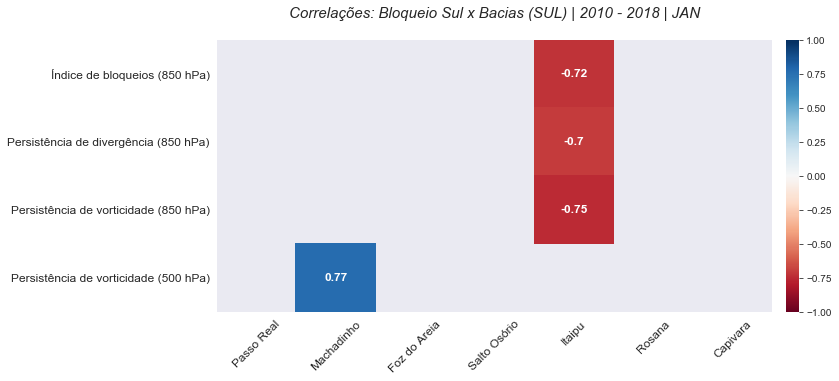

In [103]:
vazcorrs(atmds=[div_850, vort_850, vort_500], regiao='sul', freq='M', season=None, mes=1, savefig=False, save_csv=False, csv_type=None)


C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


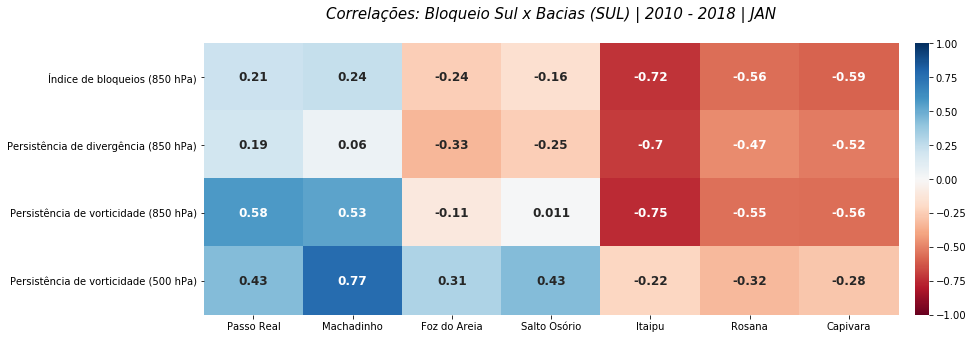

In [96]:
vazcorrs(atmds=[div_850, vort_850, vort_500], regiao='sul', freq='M', season=None, mes=1, savefig=False, save_csv=False, csv_type=None)


C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


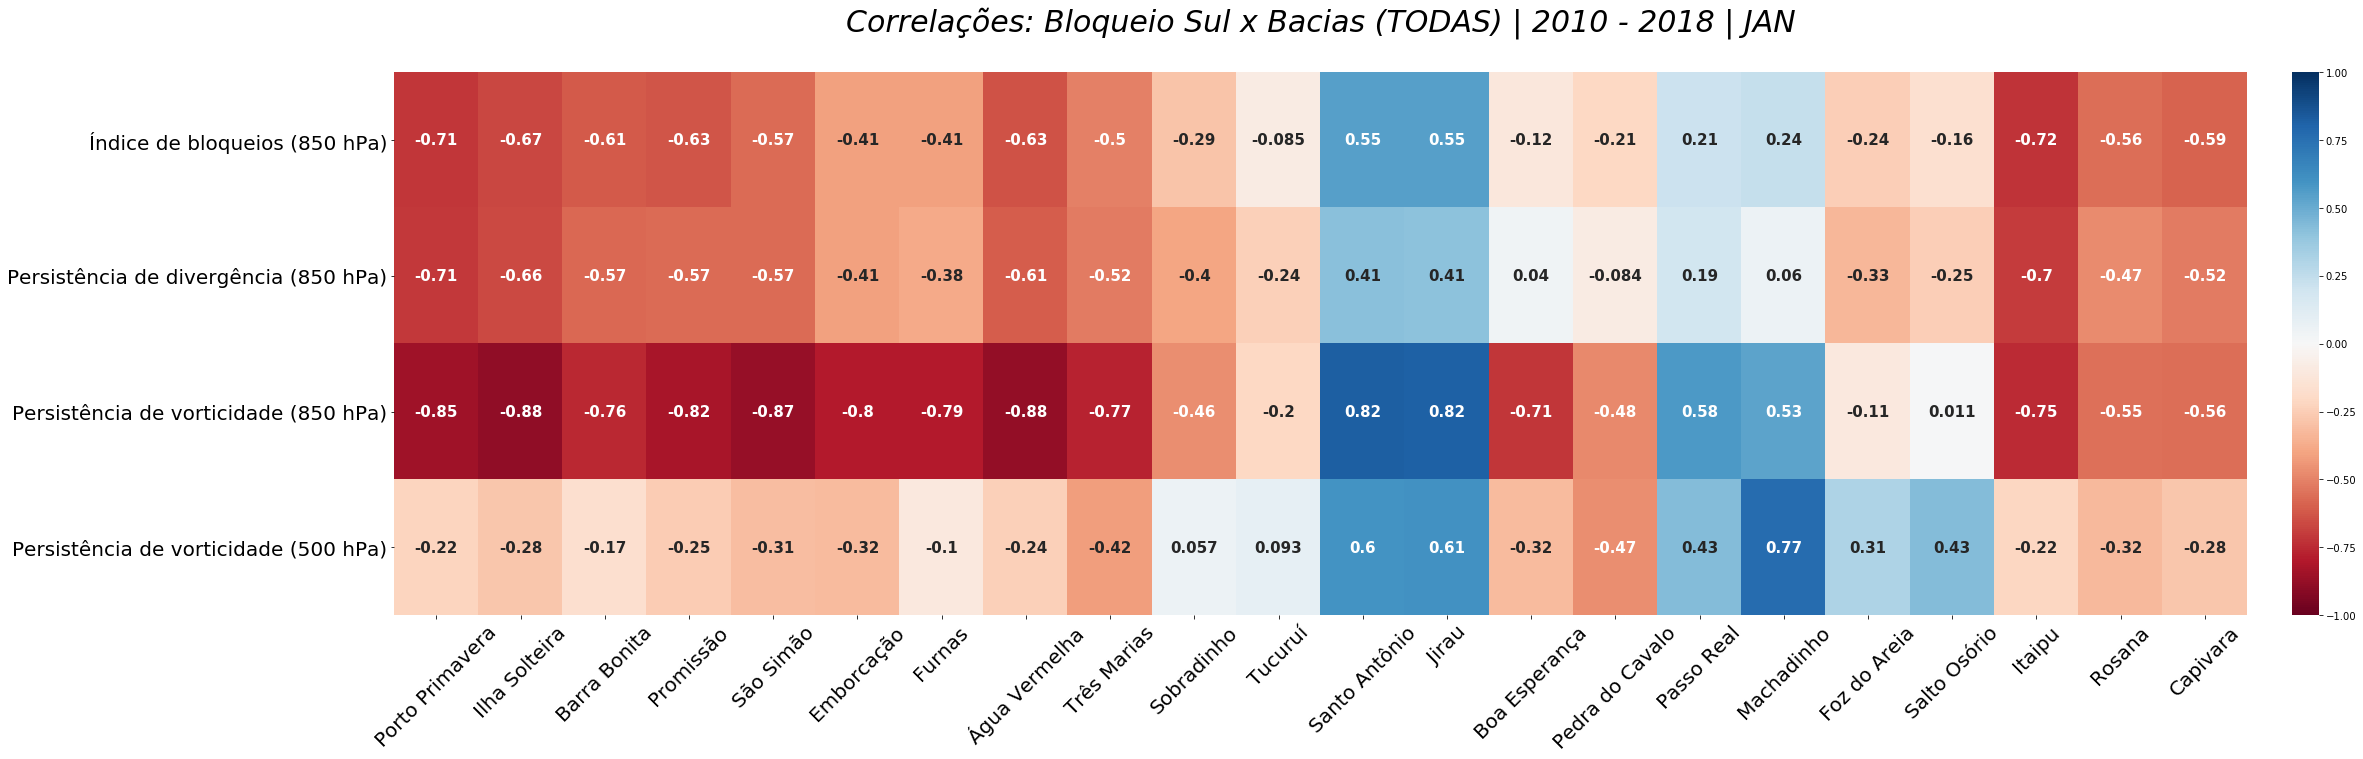

In [97]:
vazcorrs(atmds=[div_850, vort_850, vort_500], regiao='todas', freq='M', season=None, mes=1, savefig=False, save_csv=False, csv_type=None)


C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


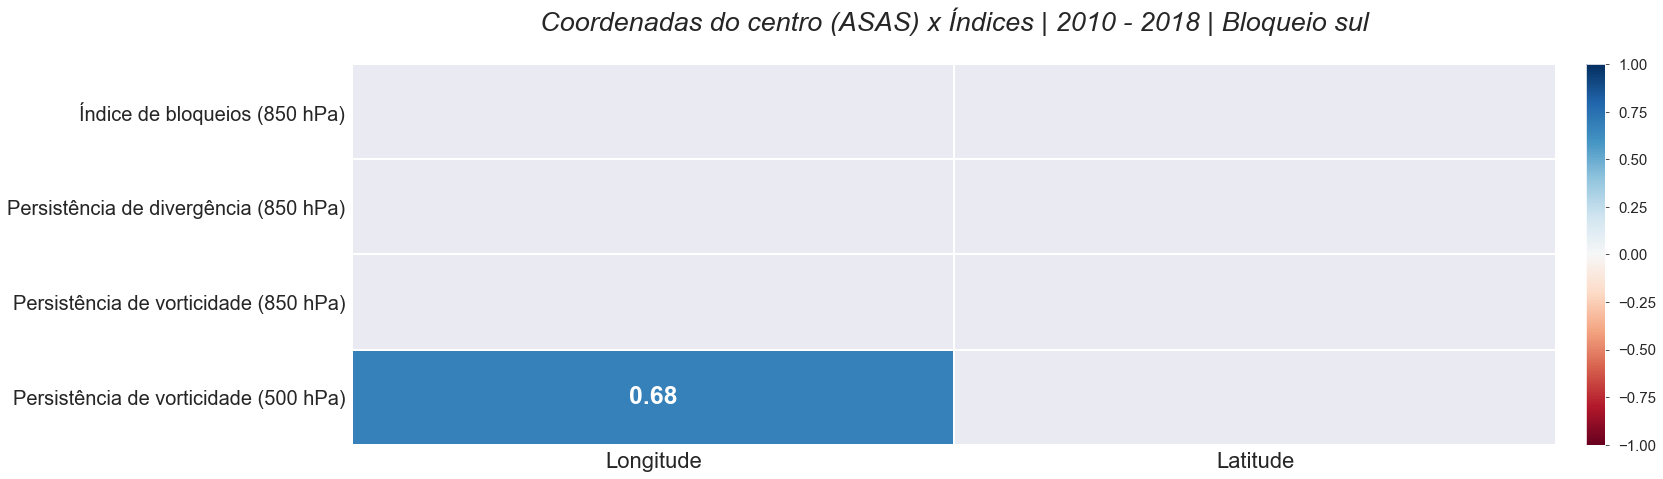

In [151]:
asas_corrs(atmds=[div_850, vort_850, vort_500], freq="M", mes=2)

CORRELAÇÕES DA BACIA DO SUL (SOMENTE) PARA INVERNO

In [113]:
seasons = ['JJA']
regioes = ['sul']
periodos = [['1979-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]
latitudes = [[-10, -25], [-17.5, -25], [-10,-17.5]]
for periodo in periodos:
    for latitude in latitudes:
        div_850 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=850, opr='divergência')
        vort_850 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=850, opr='vorticidade')
        vort_500 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=500, opr='vorticidade')
        for regiao in regioes:
            for season in seasons:
                df = vazcorrs(atmds=[div_850, vort_850, vort_500], regiao=regiao, freq='season', season=season, mes=None, savefig=False, save_csv=True)

C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype

CORRELAÇÕES PARA VERÃO

In [119]:
meses = [1, 2, 12]
regioes = ['sul' , 'todas']
periodos = [['1979-01-01', '2010-12-31'], ['2010-01-01', '2018-12-31']]
latitudes = [[-10, -25], [-17.5, -25], [-10,-17.5]]
for periodo in periodos:
    for latitude in latitudes:
        div_850 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=850, opr='divergência')
        vort_850 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=850, opr='vorticidade')
        vort_500 = dayly_obj.formatar(lat = latitude, lon = [-60, -40], time = periodo, level=500, opr='vorticidade')
        for regiao in regioes:
            for mes in meses:
                df = vazcorrs(atmds=[div_850, vort_850, vort_500], regiao=regiao, freq='M', season=None, mes=mes, savefig=False, save_csv=True)

C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\augus\Anaconda3\envs\bloqueios\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype